<a href="https://colab.research.google.com/github/rachelrozet/Deliverable-9/blob/main/Deliverable_9_Data_Analytics_Decision_Tree_for_Example_Titanic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Tree: Titanic Data Analysis

*Written by Rachel Rozet (4/26/2023)*

### **Step 1: Problem Definition**

This program aims to solve Classification problems for the given Titanic sample data, creating a Decision Tree that will expand on the relationships between specific information classes and their influence on whether or not a passenger on the Titanic survived the ship's sinking.

In [ ]:
# Import the Decision Tree Classifer and GridSearch CV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

In [ ]:
# Create dataframe from the Titanic Excel file and fill any null values
df = pd.read_csv('/content/titanic.csv')
df['Pclass'].fillna('0', inplace = True)
df['Name'].fillna('NA', inplace = True)
df['Sex'].fillna('NA', inplace = True)
df['Age'].fillna('0', inplace = True)
df['SibSp'].fillna('0', inplace = True)
df['Parch'].fillna('0', inplace = True)
df['Ticket'].fillna('NA', inplace = True)
df['Fare'].fillna('0', inplace = True)
df['Cabin'].fillna('NA', inplace = True)
df['Embarked'].fillna('NA', inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NA,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.4500,NA,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Remove the "PassengerId" column from the dataframe
df.drop(columns = 'PassengerId', axis = 1, inplace = True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NA,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0,1,2,W./C. 6607,23.4500,NA,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# Print backend information on the Titanic data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    object 
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 76.7+ KB


In [ ]:
# Import LabelEncoder to aid in encoding categorical data 
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Change string data type to float for string columns in the dataframe
df_clean = df.copy()
label_encoder = LabelEncoder()
df_clean['Name'] = label_encoder.fit_transform(df['Name'])
df_clean['Sex'] = label_encoder.fit_transform(df['Sex'])
df_clean['Ticket'] = label_encoder.fit_transform(df['Ticket'])
df_clean['Cabin'] = label_encoder.fit_transform(df['Cabin'])
df_clean['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df_clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.0,1,0,523,7.2500,146,3
1,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,1,3,353,0,26.0,0,0,669,7.9250,146,3
3,1,1,272,0,35.0,1,0,49,53.1000,55,3
4,0,3,15,1,35.0,0,0,472,8.0500,146,3
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.0,0,0,101,13.0000,146,3
887,1,1,303,0,19.0,0,0,14,30.0000,30,3
888,0,3,413,0,0,1,2,675,23.4500,146,3
889,1,1,81,1,26.0,0,0,8,30.0000,60,0


### **Step 2: Data Splitting**

In [ ]:
# Define columns to be used as features
cols = df.columns.to_list()
cols.remove('Survived')
cols

['Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
# Define features and response variables for testing purposes
features = df_clean[cols]
response = df_clean['Survived']

In [ ]:
# Import "Train_Test_Split" to use for testing
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.3, random_state = 0)

### **Step 3: Model Selection, Model Fitting, and Model Evaluation**

In [ ]:
# Import DecisionTreeClassifier to create decision tree from test data
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(features_train, response_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# Define predictions based on test features
predictions = classifier.predict(features_test)
table = pd.DataFrame({'actual':response_test, 'predict': predictions})
table

,actual,predict
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
263,0,0
718,0,0
620,0,0
786,1,0


In [ ]:
# Print accuracy score for the predictions generated from test data
from sklearn.metrics import accuracy_score
accuracy_score(response_test, predictions)

0.7947761194029851

In [ ]:
# Create confusion metrics based on predictions generated from test data
from sklearn.metrics import confusion_matrix
confusion_matrix(response_test, predictions)

array([[144,  24],
       [ 31,  69]])

In [ ]:
idx = ['actual 0', 'actual 1']

cm = pd.DataFrame(confusion_matrix(response_test, predictions),
                  columns = ['pred 0', 'pred 1'],
                  index= idx)
cm

,pred 0,pred 1
actual 0,144,24
actual 1,31,69


[Text(0.414921875, 0.96875, 'Sex <= 0.5\ngini = 0.475\nsamples = 623\nvalue = [381, 242]'),
 Text(0.176875, 0.90625, 'Pclass <= 2.5\ngini = 0.371\nsamples = 215\nvalue = [53, 162]'),
 Text(0.05, 0.84375, 'Name <= 879.0\ngini = 0.123\nsamples = 122\nvalue = [8, 114]'),
 Text(0.04, 0.78125, 'Name <= 25.5\ngini = 0.109\nsamples = 121\nvalue = [7, 114]'),
 Text(0.02, 0.71875, 'Parch <= 1.0\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.01, 0.65625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.03, 0.65625, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06, 0.71875, 'Fare <= 28.856\ngini = 0.082\nsamples = 117\nvalue = [5, 112]'),
 Text(0.05, 0.65625, 'Fare <= 28.231\ngini = 0.183\nsamples = 49\nvalue = [5, 44]'),
 Text(0.04, 0.59375, 'Age <= 37.0\ngini = 0.153\nsamples = 48\nvalue = [4, 44]'),
 Text(0.02, 0.53125, 'Ticket <= 54.0\ngini = 0.054\nsamples = 36\nvalue = [1, 35]'),
 Text(0.01, 0.46875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03, 0.46875, 'gini = 0.0\

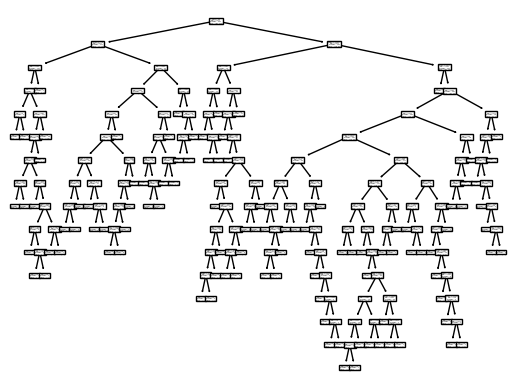

In [ ]:
# Create Decision Tree, refering to feature names
from sklearn.tree import plot_tree
plot_tree(classifier, feature_names = cols)

### **Step 4: Final Remarks**

In [ ]:
# Report importance scores for each of the defined features
importance = pd.DataFrame({'features':cols, 'importance': classifier.feature_importances_})
importance

,features,importance
0,Pclass,0.062391
1,Name,0.145719
2,Sex,0.295602
3,Age,0.134220
4,SibSp,0.016986
5,Parch,0.024291
6,Ticket,0.152362
7,Fare,0.089352
8,Cabin,0.073133
9,Embarked,0.005944


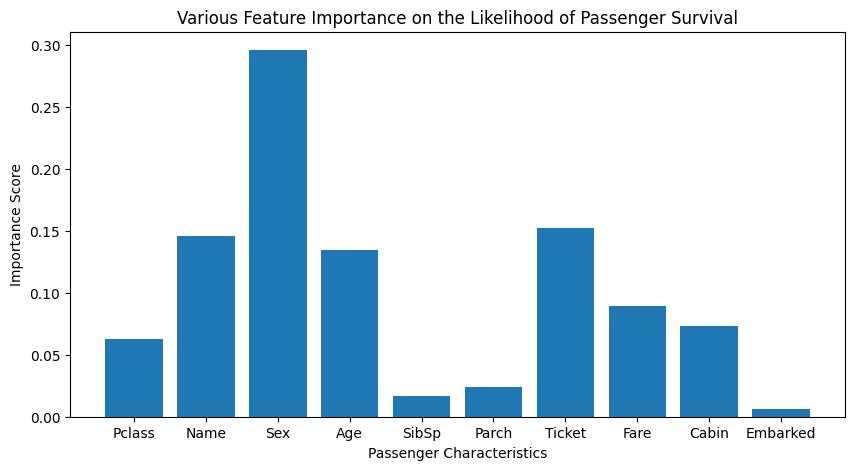

In [ ]:
# Create scatter plot to visualize importance of features on passenger survival
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,5))
plt.bar(x = cols, height = classifier.feature_importances_)
plt.title("Various Feature Importance on the Likelihood of Passenger Survival")
plt.xlabel("Passenger Characteristics")
plt.ylabel("Importance Score")
plt.show()

The histogram listed above demonstrates that, while all passenger characteristics played some role in the passenger's survival, the characteristic that influenced their likelihood of survival the most was sex. This could be due to the fact that women and children were prioritized over men when it came to stocking life boats. Therefore, it would not be surprising to learn that men had a lower likelihood of surviving the Titanic's sinking than women.

Whilst sex holds a significant influence over likelihood of passenger survival, other characteristics, such as age, name, and ticket hold medium significance, whereas information on passenger's Pclass, Cabin, SibSp, Parch, and Embarkment have little to no significance, with Embarkment being the least.